In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Exploratory Data Analysis

In [2]:
#import various provided data
dfall = pd.read_csv('CreditCardFraud_AllData.csv')
df1 = pd.read_csv('CreditCardFraud_1.csv')
df2 = pd.read_csv('CreditCardFraud_2.csv')
df3 = pd.read_csv('CreditCardFraud_3.csv')
df4 = pd.read_csv('CreditCardFraud_4.csv')
df5 = pd.read_csv('CreditCardFraud_5.csv')

In [3]:
#take a look at the data - choose a dataframe to look at
print(df3.head())
print(df3.shape)

   Time  Amount  Is.Fraud        V1        V2        V3        V4        V5  \
0    13    0.89     False -0.436905  0.918966  0.924591 -0.727219  0.915679   
1    82    5.90     False -0.888004  0.913670  1.146088  0.656290  0.677272   
2    89   37.13     False -0.589856  0.933070 -0.268073  0.125245  2.396992   
3   399   15.19     False  1.091666  0.068682  1.230334  2.554474 -0.454169   
4   421   12.41     False -1.397776  0.004573  2.528964  0.648279 -0.196625   

         V6        V7  ...       V19       V20       V21       V22       V23  \
0 -0.127867  0.707642  ...  0.025436 -0.047021 -0.194796 -0.672638 -0.156858   
1 -0.326211  0.888811  ...  0.852984  0.142757  0.107833  0.661993 -0.004713   
2  3.877945  0.189985  ...  1.424510  0.401336 -0.154397 -0.174834 -0.201369   
3  0.915781 -0.701016  ... -0.990732 -0.216638 -0.098440 -0.178428  0.007277   
4  0.163190 -0.278296  ...  0.524410  0.056481 -0.087222  0.150044  0.322306   

        V24       V25       V26       V27   

In [4]:
#check out the column names
print(dfall.columns)

Index(['Time', 'Amount', 'Is.Fraud', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')


False    284315
True        492
Name: Is.Fraud, dtype: int64


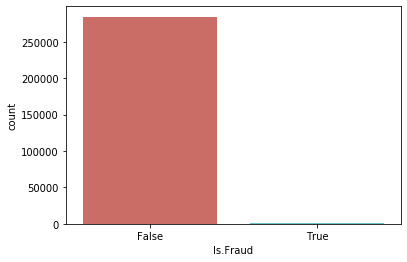

In [5]:
# count how many are of each class in original dataset: Fraud or not fraud
fraud_class = dfall['Is.Fraud'].value_counts()
print(fraud_class)
sns.countplot(x='Is.Fraud',data=dfall, palette='hls')

In [6]:
#find percentage of fraud/not fraud cases in the original dataset
print('Not fraud makes up ', round(dfall['Is.Fraud'].value_counts()[0]/len(dfall) * 100,2), '% of the data')
print('Fraud makes up', round(dfall['Is.Fraud'].value_counts()[1]/len(dfall) * 100,2), '% of the data')

Not fraud makes up  99.83 % of the data
Fraud makes up 0.17 % of the data


False    4508
True      492
Name: Is.Fraud, dtype: int64


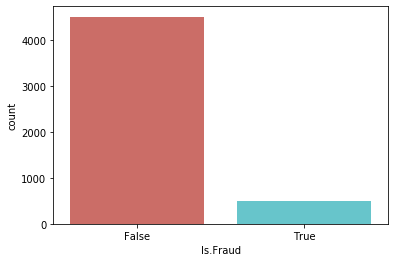

In [7]:
#count how many are of each class in subdataframe: Fraud or not fraud
fraud_class = df3['Is.Fraud'].value_counts()
print(fraud_class)
sns.countplot(x='Is.Fraud',data=df3, palette='hls')

In [8]:
#find percentage of fraud/not fraud cases in the subdataset
print('Not fraud makes up ', round(df3['Is.Fraud'].value_counts()[0]/len(df3) * 100,2), '% of the dataset')
print('Fraud makes up', round(df3['Is.Fraud'].value_counts()[1]/len(df3) * 100,2), '% of the dataset')

Not fraud makes up  90.16 % of the dataset
Fraud makes up 9.84 % of the dataset


In [9]:
# check for null values
df3.isnull().sum().max()

0

In [10]:
df3.describe()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,93793.844800,87.616238,-0.441065,0.391207,-0.689673,0.449368,-0.315963,-0.132320,-0.565869,0.044809,...,0.057555,0.037399,0.057844,-0.007837,0.000588,-0.010667,-0.005473,0.007151,0.018784,0.015622
std,47464.044369,215.117963,3.073766,2.202979,3.344737,2.085258,2.236770,1.433974,2.972431,2.470608,...,0.928045,0.777813,1.446733,0.835650,0.671667,0.596025,0.546048,0.471674,0.551305,0.301861
min,13.000000,0.000000,-30.552380,-20.949142,-31.103685,-4.655639,-22.105532,-6.406267,-43.557242,-41.044261,...,-3.681904,-11.301771,-22.797604,-8.887017,-19.254328,-2.425787,-4.781606,-1.664130,-7.263482,-2.748073
25%,53768.500000,4.842500,-1.111568,-0.543870,-1.243362,-0.766730,-0.828265,-0.866810,-0.738763,-0.196364,...,-0.453115,-0.202001,-0.228474,-0.554973,-0.166869,-0.361035,-0.325047,-0.312071,-0.067992,-0.052506
50%,84317.500000,20.410000,-0.169319,0.167767,0.018644,0.142557,-0.124561,-0.337693,-0.033252,0.050484,...,0.035202,-0.046043,-0.010311,-0.003851,-0.010270,0.028144,0.013198,-0.033822,0.009217,0.014932
75%,138639.250000,82.137500,1.254644,1.008566,0.918051,1.083073,0.584521,0.330710,0.527875,0.404370,...,0.523097,0.176730,0.225273,0.540088,0.160085,0.417500,0.349868,0.251877,0.126518,0.095771
max,172743.000000,4487.490000,2.356745,22.057729,3.748614,12.114672,11.095089,13.470790,11.217637,20.007208,...,5.228342,11.059004,27.202839,8.361985,8.178541,3.658746,3.265186,3.067907,3.479621,6.582617


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


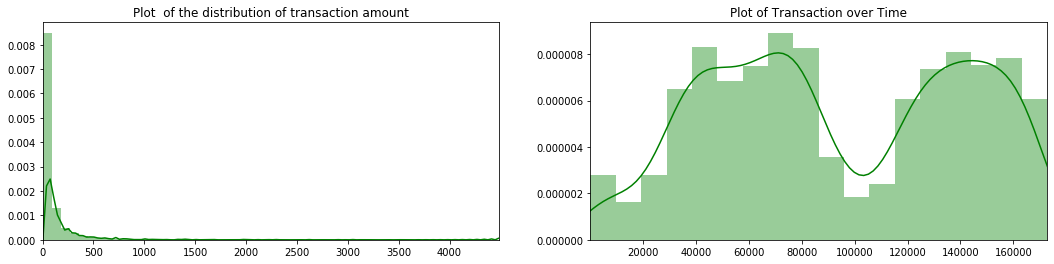

In [11]:
# plot distribution of transaction amount and transactions across time

fig, ax = plt.subplots(1, 2, figsize=(18,4))

#get the values from the columns amount and time
amounts = df3['Amount'].values
times = df3['Time'].values

#Create plot for distribution of amount
sns.distplot(amounts, ax=ax[0], color='g')
ax[0].set_title('Plot  of the distribution of transaction amount', fontsize=12)
ax[0].set_xlim([min(amounts), max(amounts)])

#Create plot for transacion through time
sns.distplot(times, ax=ax[1], color='g')
ax[1].set_title('Plot of Transaction over Time', fontsize=12)
ax[1].set_xlim([min(times), max(times)])

plt.show()

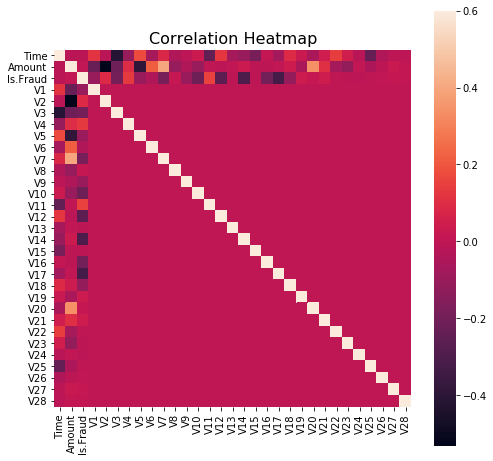

In [12]:
# plot correlation heatmap for full dataset
correlation = dfall.corr()
f , ax = plt.subplots(figsize = (8,8)) 
plt.title('Correlation Heatmap',y=1,size=16) 
sns.heatmap(correlation, square = True, vmax=0.6)

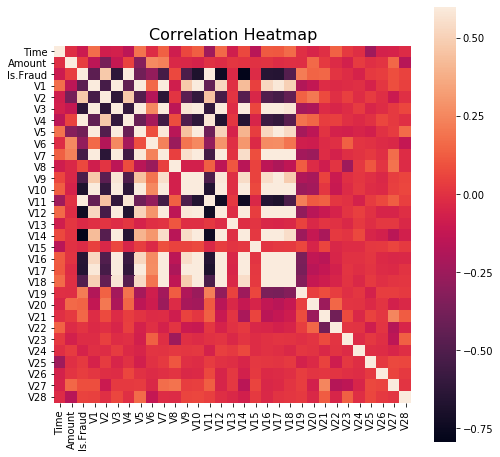

In [13]:
# plot correlation for subdataframe
correlation = df2.corr()
f , ax = plt.subplots(figsize = (8,8)) 
plt.title('Correlation Heatmap',y=1,size=16) 
sns.heatmap(correlation, square = True, vmax=0.6)

In [14]:
# Find the features which have the strongest correlation with fraud
correlation = df3.corr()['Is.Fraud'][:] 

#Make a list of the features which have a correlation with absolute value larger than 0.5 to list out
features_list = correlation[abs(correlation) > 0.5].sort_values(ascending=False)
print("There is {} values which are notably correlated with Is.Fraud:\n{}".format(len(features_list), features_list))

There is 11 values which are notably correlated with Is.Fraud:
Is.Fraud    1.000000
V11         0.668056
V4          0.648455
V9         -0.511484
V7         -0.556084
V3         -0.626626
V16        -0.650123
V17        -0.655595
V10        -0.686674
V12        -0.739767
V14        -0.799261
Name: Is.Fraud, dtype: float64


# Model 1: Feature selection based on correlated features

In [15]:
# Need to transform the data in the columns Time and Amount for all dataframes
# Do this for all dataframes in case we want to check for different results across dfs

std_scaler = StandardScaler()

dfall['scaled_amount'] = std_scaler.fit_transform(dfall['Amount'].values.reshape(-1,1))
dfall['scaled_time'] = std_scaler.fit_transform(dfall['Time'].values.reshape(-1,1))
dfall.drop(['Time','Amount'], axis=1, inplace=True)

df1['scaled_amount'] = std_scaler.fit_transform(df1['Amount'].values.reshape(-1,1))
df1['scaled_time'] = std_scaler.fit_transform(df1['Time'].values.reshape(-1,1))
df1.drop(['Time','Amount'], axis=1, inplace=True)

df2['scaled_amount'] = std_scaler.fit_transform(df2['Amount'].values.reshape(-1,1))
df2['scaled_time'] = std_scaler.fit_transform(df2['Time'].values.reshape(-1,1))
df2.drop(['Time','Amount'], axis=1, inplace=True)

df3['scaled_amount'] = std_scaler.fit_transform(df3['Amount'].values.reshape(-1,1))
df3['scaled_time'] = std_scaler.fit_transform(df3['Time'].values.reshape(-1,1))
df3.drop(['Time','Amount'], axis=1, inplace=True)

df4['scaled_amount'] = std_scaler.fit_transform(df4['Amount'].values.reshape(-1,1))
df4['scaled_time'] = std_scaler.fit_transform(df4['Time'].values.reshape(-1,1))
df4.drop(['Time','Amount'], axis=1, inplace=True)

df5['scaled_amount'] = std_scaler.fit_transform(df5['Amount'].values.reshape(-1,1))
df5['scaled_time'] = std_scaler.fit_transform(df5['Time'].values.reshape(-1,1))
df5.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
#Look at the scaled data
print(df3.head())

   Is.Fraud        V1        V2        V3        V4        V5        V6  \
0     False -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
1     False -0.888004  0.913670  1.146088  0.656290  0.677272 -0.326211   
2     False -0.589856  0.933070 -0.268073  0.125245  2.396992  3.877945   
3     False  1.091666  0.068682  1.230334  2.554474 -0.454169  0.915781   
4     False -1.397776  0.004573  2.528964  0.648279 -0.196625  0.163190   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
1  0.888811 -0.341848 -0.523849  ...  0.107833  0.661993 -0.004713  0.031097   
2  0.189985  0.960389 -0.230000  ... -0.154397 -0.174834 -0.201369  1.013439   
3 -0.701016  0.396866  0.307571  ... -0.098440 -0.178428  0.007277 -0.504025   
4 -0.278296  0.366045  0.435493  ... -0.087222  0.150044  0.322306  0.091753   

        V25       V26       V27       V28  scaled_amount  scaled_tim

In [17]:
# Extract the columns we want to investigate based on the correlation

names = ['Is.Fraud','V11', 'V4','V9','V7', 'V3', 'V16','V17','V10', 'V12','V14']
df_selected1 = pd.DataFrame(df1, columns=names)
df_selected2 = pd.DataFrame(df2, columns=names)
df_selected3 = pd.DataFrame(df3, columns=names)
df_selected4 = pd.DataFrame(df4, columns=names)
df_selected5 = pd.DataFrame(df5, columns=names)

In [18]:
print(df_selected3.head())

   Is.Fraud       V11        V4        V9        V7        V3       V16  \
0     False  0.324098 -0.727219 -0.665271  0.707642  0.924591  1.143174   
1     False  1.160793  0.656290 -0.523849  0.888811  1.146088 -0.180816   
2     False -0.596572  0.125245 -0.230000  0.189985 -0.268073 -0.608157   
3     False -1.410625  2.554474  0.307571 -0.701016  1.230334  0.541796   
4     False -0.678178  0.648279  0.435493 -0.278296  2.528964 -0.471960   

        V17       V10       V12       V14  
0 -0.928709 -0.737980  0.277192 -0.291896  
1 -0.749369  0.690440  0.831569 -0.018098  
2 -0.159370  0.295110 -0.118181  0.063381  
3 -0.274024  0.475235 -0.508594 -0.199105  
4  0.419925 -0.308060 -0.219642 -0.383811  


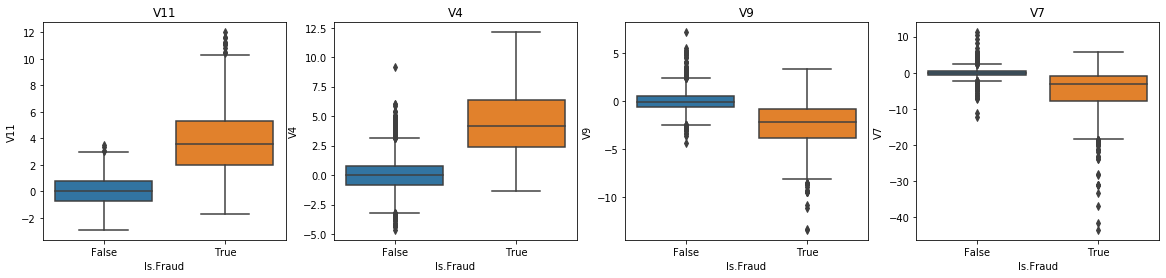

In [19]:
#plot bloxplots for 4 features at a time, for one selected dataframe
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Is.Fraud", y="V11", data=df_selected3, ax=axes[0])
axes[0].set_title('V11')

sns.boxplot(x="Is.Fraud", y="V4", data=df_selected3, ax=axes[1])
axes[1].set_title('V4')


sns.boxplot(x="Is.Fraud", y="V9", data=df_selected3, ax=axes[2])
axes[2].set_title('V9')


sns.boxplot(x="Is.Fraud", y="V7", data=df_selected3, ax=axes[3])
axes[3].set_title('V7')

plt.show()

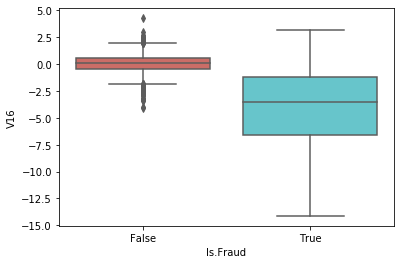

In [20]:
# one boxplot with colors to match fraud vs not fraud plot
sns.boxplot(x='Is.Fraud', y='V16', data=df_selected3, palette='hls')

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:656: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


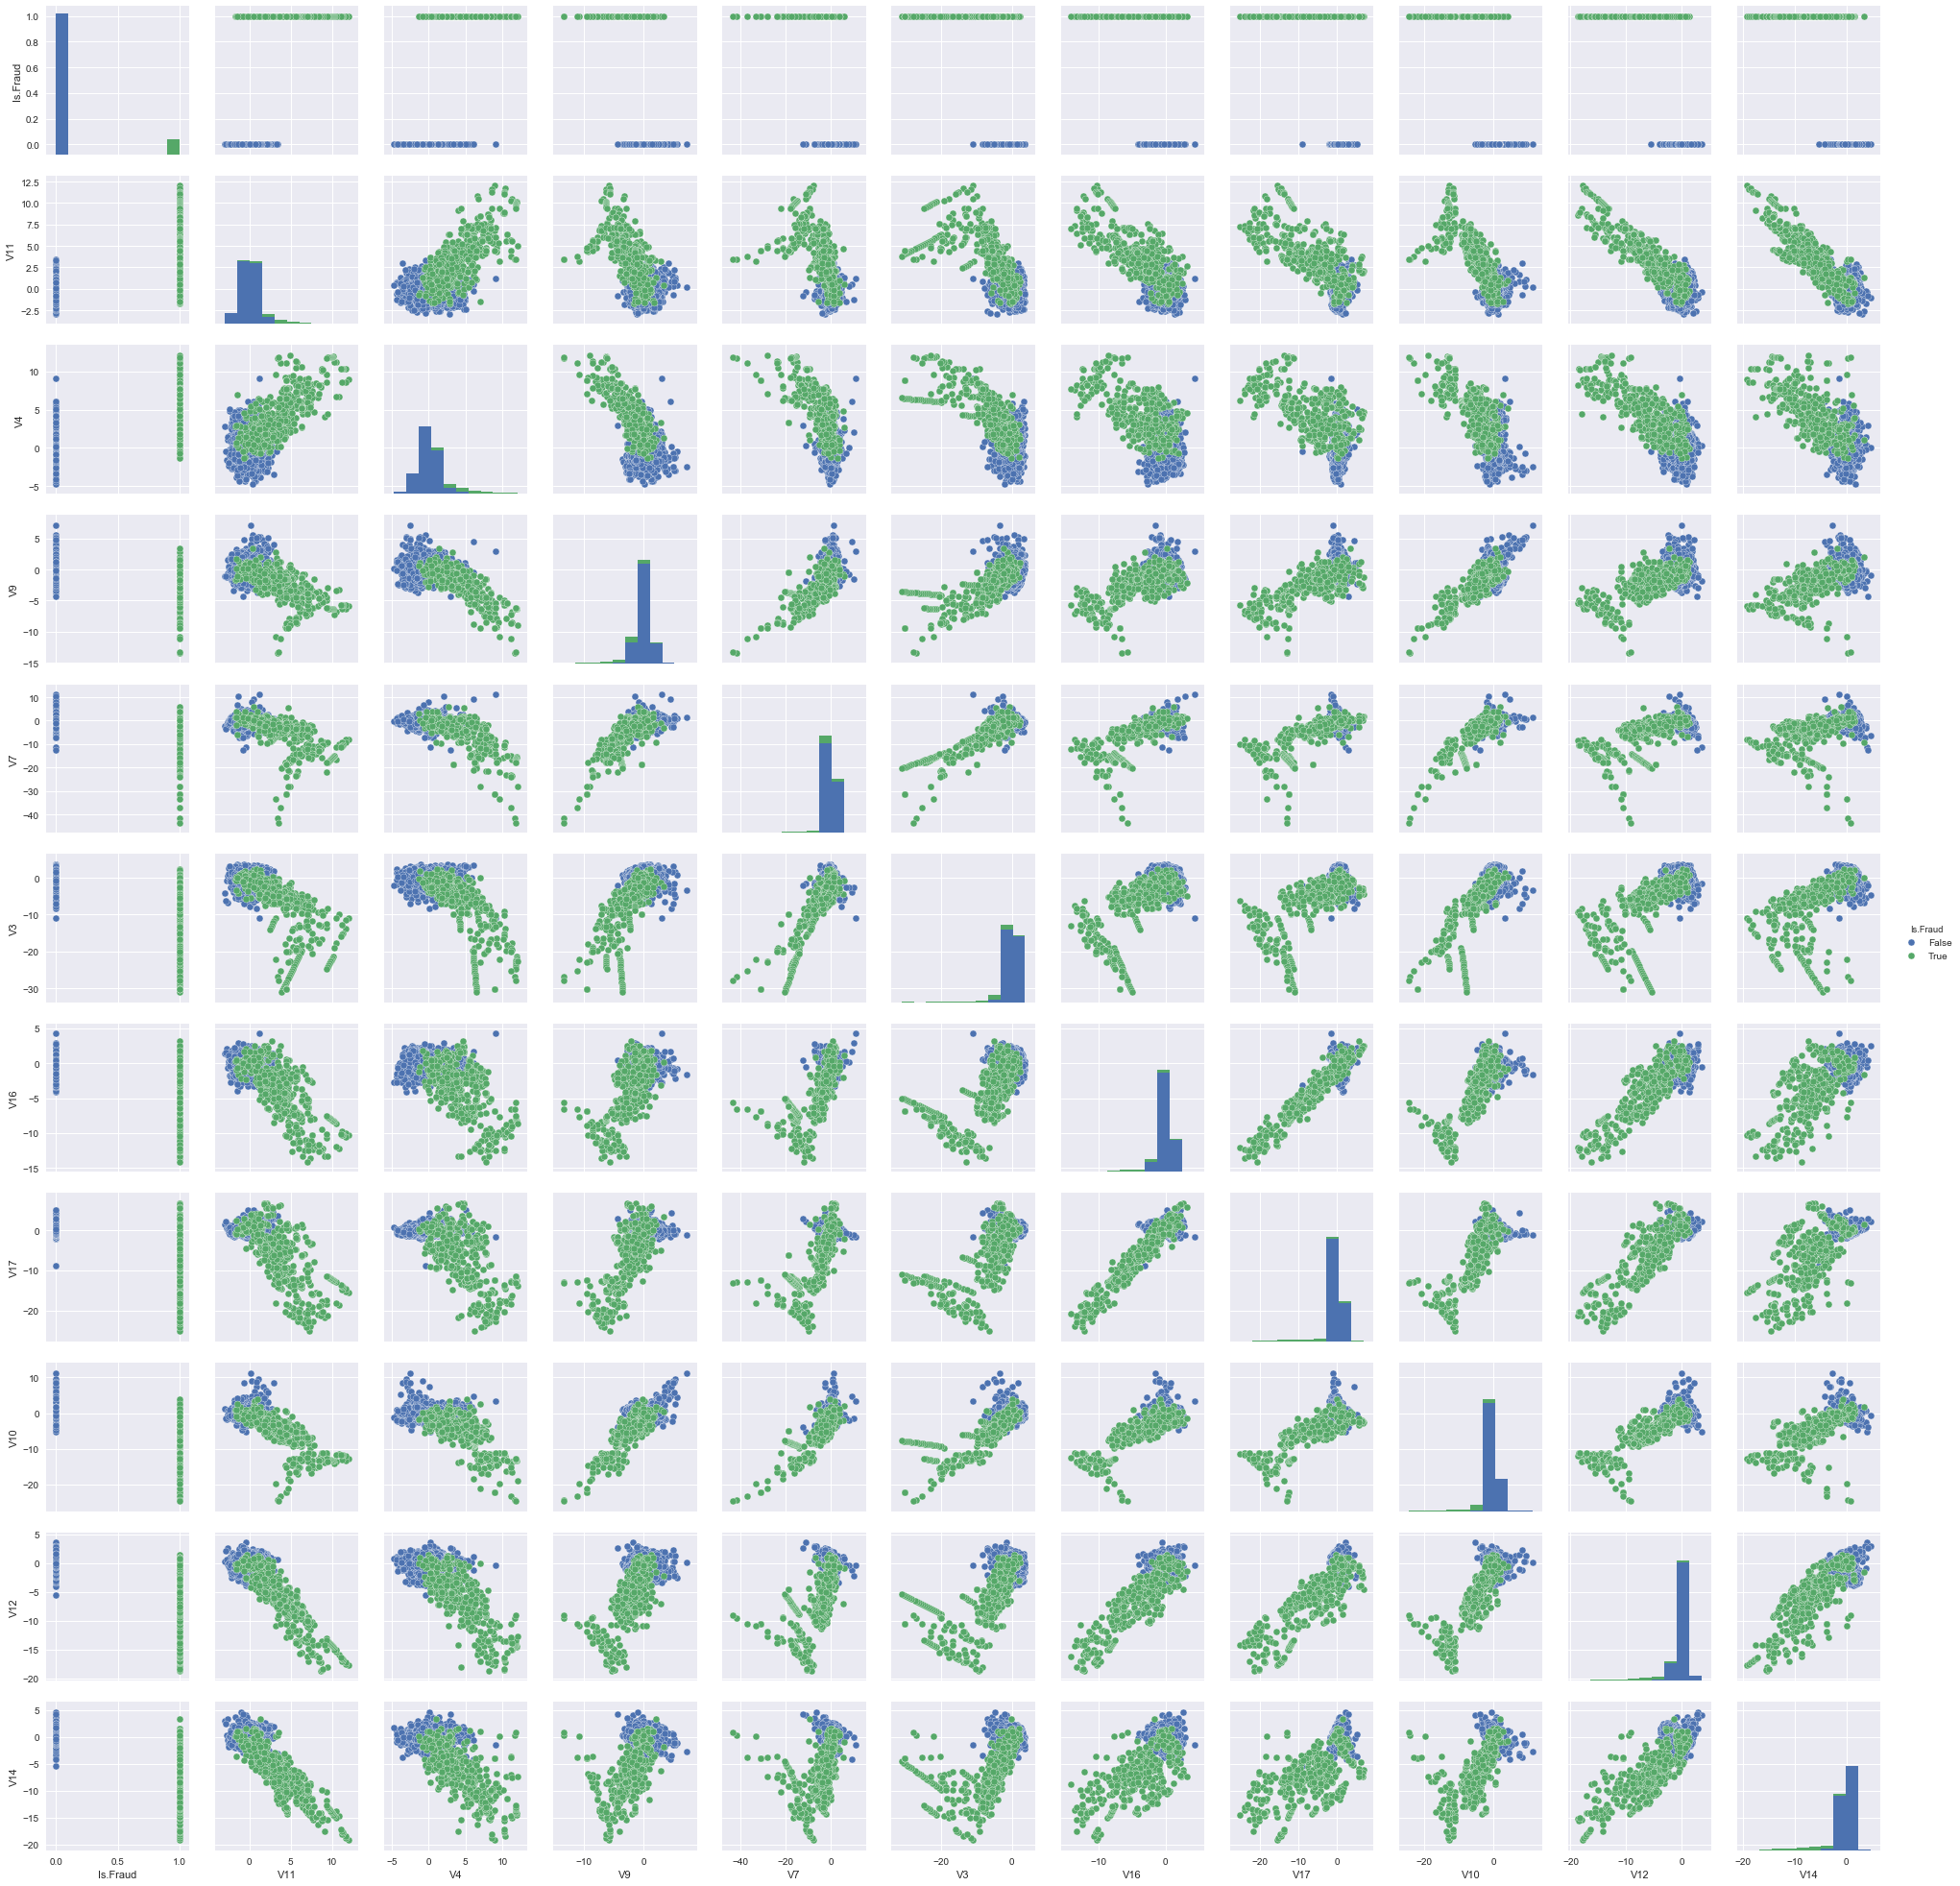

In [21]:
#pairplot to investigate relationships between variables
sns.set()
sns.pairplot(df_selected3[names], hue="Is.Fraud")
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


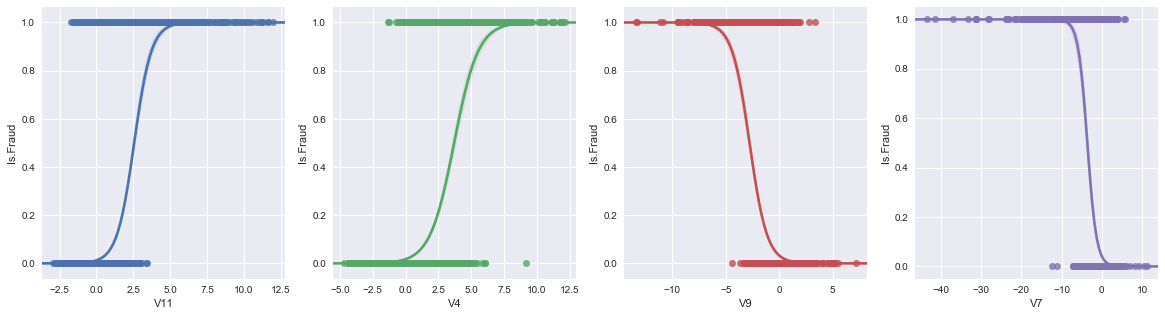

In [22]:
#Look at logistic model for 4 variables at a time
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
         
plot1 = pd.concat([df_selected3[names[1]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[1],y = names[0],data = plot1, scatter= True, logistic=True, ax=ax[0]) 
         
plot1 = pd.concat([df_selected3[names[2]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[2],y = names[0],data = plot1, scatter= True, logistic=True, ax=ax[1])

plot1 = pd.concat([df_selected3[names[3]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[3],y = names[0], data = plot1, scatter= True, logistic=True, ax=ax[2])

plot1 = pd.concat([df_selected3[names[4]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[4],y = names[0], data = plot1, scatter= True, logistic=True, ax=ax[3])

# Build model

In [23]:
#Choose the columns we want to use to predict Outcome with 
train_cols = names[1:]

#We use the logit function as we are doing logistic regression
logit = sm.Logit(df_selected3['Is.Fraud'], df_selected3[train_cols]) # We fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.630819
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Is.Fraud   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4990
Method:                           MLE   Df Model:                            9
Date:                Thu, 19 Sep 2019   Pseudo R-squ.:                 -0.9618
Time:                        11:24:00   Log-Likelihood:                -3154.1
converged:                       True   LL-Null:                       -1607.8
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V11            0.1428      0.034      4.202      0.000       0.076       0.209
V4             0.0933      0

In [24]:
# extract features (x) and value to predict (y) using subdataframe 3
X = df_selected3.iloc[:, df_selected3.columns != 'Is.Fraud']
y = df_selected3.iloc[:, df_selected3.columns == 'Is.Fraud']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Transactions train dataset: ", len(X_train))
print("Transactions test dataset: ", len(X_test))
print("Total transactions: ", len(X_train)+len(X_test))

Transactions train dataset:  3500
Transactions test dataset:  1500
Total transactions:  5000


In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.98


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[1348    3]
 [  22  127]]


Text(0.5, 257.44, 'Predicted label')

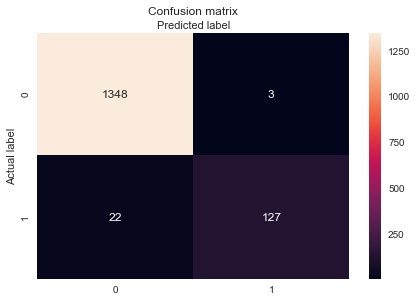

In [29]:
#Make styled confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1351
        True       0.98      0.85      0.91       149

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## Further investigation of model results / predicted output

In [31]:
#get data point where Is.Fraud is True
print(df3[df3['Is.Fraud'] == True].head(1))

      Is.Fraud        V1        V2        V3        V4        V5        V6  \
4508      True -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   

            V7        V8        V9  ...       V21       V22       V23  \
4508 -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   

           V24       V25      V26       V27       V28  scaled_amount  \
4508  0.320198  0.044519  0.17784  0.261145 -0.143276      -0.407335   

      scaled_time  
4508    -1.967746  

[1 rows x 31 columns]


In [32]:
print(y[y['Is.Fraud'] == True].head(5))
print(X.iloc[[4512]].values)
print(y.iloc[[4512]].values)

      Is.Fraud
4508      True
4509      True
4510      True
4511      True
4512      True
[[ 2.10134387  4.73279513 -1.28285782  1.71344499 -4.30459688  2.58185095
   6.73938438 -2.44746926 -4.60962839 -6.07933719]]
[[ True]]


In [33]:
# get probabilities for specific data point
probs = logreg.predict_proba(X.iloc[[4512]].values)
print(probs)

[[0.00182076 0.99817924]]


In [34]:
# get model coefficients
logreg.coef_

array([[ 0.39727837,  0.95886159, -0.13039493, -0.16831292, -0.2842786 ,
        -0.98797702, -1.00909374, -0.92577482, -0.96267919, -1.2210314 ]])

## Check results for model using full dataset

In [35]:
X = dfall[names[1:]]
y = dfall.iloc[:, dfall.columns == 'Is.Fraud']

# Split whole dataset into test and train sets
Xall_train, Xall_test, yall_train, yall_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number of transactions train dataset: ", len(Xall_train))
print("Number of transactions test dataset: ", len(Xall_test))
print("Total number of transactions: ", len(Xall_train)+len(Xall_test))

Number of transactions train dataset:  199364
Number of transactions test dataset:  85443
Total number of transactions:  284807


In [36]:
#try to predicting using the full dataset
yall_pred = logreg.predict(Xall_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Xall_test, yall_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

#Look at confusion matrix
confusion_matrix = confusion_matrix(yall_test, yall_pred)
print(confusion_matrix)
print(classification_report(yall_test, yall_pred))

[[85116   180]
 [   23   124]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     85296
        True       0.41      0.84      0.55       147

    accuracy                           1.00     85443
   macro avg       0.70      0.92      0.77     85443
weighted avg       1.00      1.00      1.00     85443

